## RandomForest Example using a Breast Cancer dataset
- A total of 29 features that were computed for each cell nucleus 
- each has an ID Number and the Diagnosis  
- (Later converted to  binary representations: Malignant = 1, Benign = 0).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier 

In [58]:
breast_cancer = pd.read_csv('Breast_Cancer.csv')
breast_cancer.shape

(569, 32)

In [59]:
breast_cancer.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [60]:
names = ['id','radius_mean', 
         'texture_mean', 'perimeter_mean', 'area_mean', 
         'smoothness_mean', 'compactness_mean', 
         'concavity_mean','concave_points_mean', 
         'symmetry_mean', 'fractal_dimension_mean',
         'radius_se', 'texture_se', 'perimeter_se', 
         'area_se', 'smoothness_se', 'compactness_se', 
         'concavity_se', 'concave_points_se', 
         'symmetry_se', 'fractal_dimension_se', 
         'radius_worst', 'texture_worst', 
         'perimeter_worst', 'area_worst', 
         'smoothness_worst', 'compactness_worst', 
         'concavity_worst', 'concave_points_worst', 
         'symmetry_worst', 'fractal_dimension_worst',"diagnosis"] 

In [61]:
# Setting 'id_number' as our index
breast_cancer.set_index(['id'], inplace = True)

In [62]:
# Converted to binary to help later on with models and plots
breast_cancer['diagnosis'] = breast_cancer['diagnosis'].map({'M':1, 'B':0})

In [63]:
# Missing Values :  Printing the column name and total missing values 
#for that column, iteratively.
breast_cancer.apply(lambda x: x.isnull().sum())

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

In [10]:
# For later use in CART models
features_name = names[1:31]

In [11]:
print("Here's the dimensions of our data frame:\n", 
     breast_cancer.shape)
print("Here's the data types of our columns:\n",
     breast_cancer.dtypes)

Here's the dimensions of our data frame:
 (569, 31)
Here's the data types of our columns:
 radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64

## Class Imbalance

The distribution of diagnoses is important because it speaks to class 
imbalance within machine learning and data mining applications. 
Class imbalance is a term used to describe when a target class 
within a data set is outnumbered by another target class (or classes).
This can create misleading accuracy metrics, known as an accuracy paradox. 
To make sure our target classes aren't imbalanced, create a function 
that will output the distribution of the target classes.
'''

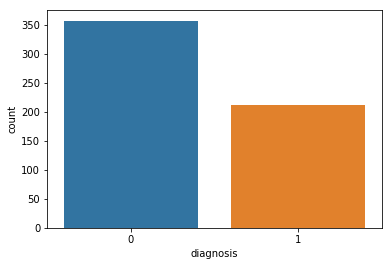

In [13]:
# Now lets check the class distributions
sns.countplot("diagnosis",data=breast_cancer)

In [14]:
def print_class_perc(dataframe,target_col):
    try:
        # Stores value counts
        col_vals = dataframe[target_col].value_counts()
        # Resets index to make index a column in data frame
        col_vals = col_vals.reset_index()
        # Create a function to output the percentage
        f = lambda x, y: 100 * (x / sum(y))
        
        for i in range(0, len(col_vals)):
            print('{0} accounts for {1:.2f}% of the {2} column'\
                  .format(col_vals['index'][i],
                          f(col_vals[target_col].iloc[i],
                            col_vals[target_col]),
                          target_col))
    except KeyError  as e:
        print('{0}: Not found'.format(e))
        print('Please choose the right column name!')  

In [15]:
print_class_perc(breast_cancer,"diagnosis")

0 accounts for 62.74% of the diagnosis column
1 accounts for 37.26% of the diagnosis column



### Next, we apply a function that gives us standard descriptive statistics for each feature including mean, 
#standard deviation, minimum value, maximum value, and range intervals.


In [16]:
breast_cancer.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


'''
You can see in the maximum row of the chart that our data varies in distribution
; this will be important as we consider classification models. Standardization 
is an important requirement for many classification models that should be 
handled when implementing pre-processing. Some models (like neural networks) 
can perform poorly if pre-processing isn't considered, so the describe()
function is a good indicator for standardization. 

Fortunately, random forest does not require any pre-processing

- step 1) sc=StandardScaler()
- step 2) sc.fit_transform(X_train)
- step 3) sc.transform(X_test)
'''

In [23]:
X = breast_cancer.iloc[:, 0:-1]
Y = breast_cancer.iloc[:, -1]

In [26]:
## Splitting the dataset in training and test
X_training, X_test, Y_training, Y_test = train_test_split(X,Y, test_size = 0.20, 
                                                                    random_state = 42)

In [27]:
Y_training = Y_training.values.ravel() 
Y_test = Y_test.values.ravel() 

In [28]:
# Set the random state for reproducibility
model = RandomForestClassifier(random_state=42)

## Hyperparameters Optimization

Utilizing the GridSearchCV functionality, let's create a dictionary with 
parameters we are looking to optimize to create the best model for our data.
Setting the n_jobs to -1 tells the grid search to run three jobs in parallel, 
reducing the time the function will take to compute the best parameters. 
I included the timer to see how long different jobs took; that led me to 
ultimately decide to use three parallel jobs.

This will help set the parameters  to tune one final parameter: 
    the number of trees in our forest.

In [29]:
np.random.seed(42)

param_dist = {'max_depth': [2, 3, 4],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'criterion': ['gini', 'entropy']}

model_opt = GridSearchCV(model, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = -1)

model_opt.fit(X_training, Y_training)
print('\n Best Parameters using grid search: \n\n {} \n'.format(model_opt.best_params_))


 Best Parameters using grid search: 

 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2'} 



C:\Users\Ryans\Anaconda3\envs\venv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\Ryans\Anaconda3\envs\venv\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [30]:
model.set_params(criterion = 'gini',
                  max_features = 'log2', 
                  max_depth = 3)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

## Approach 1
## Out of Bag Error Rate

Another useful feature of random forest is the concept of an out-of-bag (OOB) 
error rate. Because only two-thirds of the data are used to train each tree 
when building the forest, one-third of unseen data can be used in a way that 
is advantageous to our accuracy metrics without being as computationally 
expensive as something like cross validation, for instance.

In [31]:
model.set_params(warm_start=True, 
                  oob_score=True)

min_estimators = 100
max_estimators = 1000

error_rate = {}

In [32]:
for i in range(min_estimators, max_estimators + 1):
    model.set_params(n_estimators=i)
    model.fit(X_training, Y_training)

    oob_error = 1 - model.oob_score_
    error_rate[i] = oob_error

In [33]:
# Convert dictionary to a pandas series for easy plotting 
oob_series = pd.Series(error_rate)

In [35]:
oob_series.head()

100    0.043956
101    0.041758
102    0.041758
103    0.041758
104    0.041758
dtype: float64

Text(0.5, 1.0, 'OOB Error Rate Across various Forest sizes \n(From 100 to 1000 trees)')

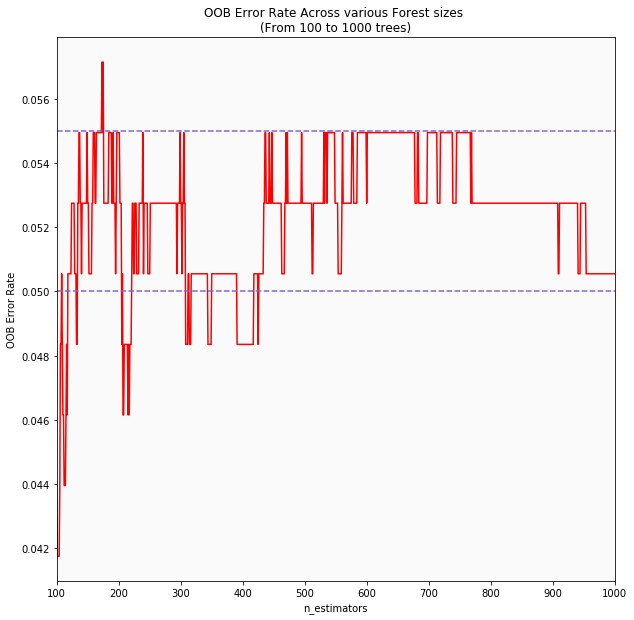

In [36]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))

ax.set_facecolor('#fafafa')

oob_series.plot(kind='line',
                color = 'red')
plt.axhline(0.055, 
            color='#875FDB',
           linestyle='--')
plt.axhline(0.05, 
            color='#875FDB',
           linestyle='--')
plt.xlabel('n_estimators')
plt.ylabel('OOB Error Rate')
plt.title('OOB Error Rate Across various Forest sizes \n(From 100 to 1000 trees)')

In [37]:
print('OOB Error rate for 500 trees is: {0:.5f}'.format(oob_series[500]))

OOB Error rate for 500 trees is: 0.05275


## approach 2 
## Traditional Training and Test Set Split
In order for this methodology to work we will set the number of trees 
calculated using the OOB error rate, and removing the warm_start and oob_score
parameters. Along with including the bootstrap parameter.

In [38]:
model.set_params(n_estimators=500,
                  bootstrap = True,
                  warm_start=False, 
                  oob_score=False)
model.fit(X_training, Y_training)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [47]:
def variable_importance(fitted_model):
    """
    Purpose
    ----------
    Checks if model is fitted CART model then produces variable importance
    and respective indices in dictionary.

    Parameters
    ----------
    * fit:  Fitted model containing the attribute feature_importances_

    Returns
    ----------
    Dictionary containing arrays with importance score and index of columns
    ordered in descending order of importance.
    """
    try:
        if not hasattr(fitted_model, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fitted_model)) 

        # Captures whether the model has been trained
        if not vars(fitted_model)["estimators_"]:
            return print("Model does not appear to be trained.")
    except KeyError:
        print("Model entered does not contain 'estimators_' attribute.")

    importances = fitted_model.feature_importances_
    indices = np.argsort(importances)[::-1]
    return {'importance': importances,
            'index': indices}

In [48]:
var_imp_model = variable_importance(model)
importances_model = var_imp_model['importance']

indices_model = var_imp_model['index']

In [49]:
def print_var_importance(importance, indices, features_name):
    """
    Purpose
    ----------
    Prints dependent variable names ordered from largest to smallest
    based on information gain for CART model.
    Parameters
    ----------
    * importance: Array returned from feature_importances_ for CART
                models organized by dataframe index
    * indices: Organized index of dataframe from largest to smallest
                based on feature_importances_
    * name_index: Name of columns included in model

    Returns
    ----------
    Prints feature importance in descending order
    """
    print("Feature ranking:")

    for f in range(0, indices.shape[0]):
        print("{0}. The feature '{1}' has a Mean Decrease in Impurity of {2:.5f}"
              .format(f + 1,
                      features_name[indices[f]],
                      importance[indices[f]]))

In [43]:
print_var_importance(importances_model, indices_model, features_name)

Feature ranking:
1. The feature 'concave_points_worst' has a Mean Decrease in Impurity of 0.13139
2. The feature 'area_worst' has a Mean Decrease in Impurity of 0.12164
3. The feature 'perimeter_worst' has a Mean Decrease in Impurity of 0.11882
4. The feature 'concave_points_mean' has a Mean Decrease in Impurity of 0.10498
5. The feature 'radius_worst' has a Mean Decrease in Impurity of 0.08614
6. The feature 'concavity_mean' has a Mean Decrease in Impurity of 0.05988
7. The feature 'perimeter_mean' has a Mean Decrease in Impurity of 0.05244
8. The feature 'area_mean' has a Mean Decrease in Impurity of 0.05217
9. The feature 'radius_mean' has a Mean Decrease in Impurity of 0.05173
10. The feature 'concavity_worst' has a Mean Decrease in Impurity of 0.04100
11. The feature 'area_se' has a Mean Decrease in Impurity of 0.03845
12. The feature 'compactness_worst' has a Mean Decrease in Impurity of 0.01898
13. The feature 'texture_worst' has a Mean Decrease in Impurity of 0.01624
14. The fe

In [50]:
scores = cross_val_score(model, 
                         X_training, 
                         Y_training, 
                         cv = KFold(n_splits=10))

In [51]:
for i in range(0, len(scores)):
    print("Cross validation run {0}: {1: 0.3f}".format(i, scores[i]))
print("Accuracy: {0: 0.3f} (+/- {1: 0.3f})"\
              .format(scores.mean(), scores.std() / 2))

Cross validation run 0:  1.000
Cross validation run 1:  0.957
Cross validation run 2:  0.935
Cross validation run 3:  0.935
Cross validation run 4:  0.957
Cross validation run 5:  0.978
Cross validation run 6:  0.933
Cross validation run 7:  0.889
Cross validation run 8:  1.000
Cross validation run 9:  0.889
Accuracy:  0.947 (+/-  0.019)


## predictions

In [52]:
predictions = model.predict(X_test)

## Confusion Matrix
Here we create a confusion matrix visual with seaborn and transposing 
the matrix when creating the heatmap

In [53]:
def create_conf_mat(Y_test, predictions):
    """Function returns confusion matrix comparing two arrays"""
    # Set Metrics
    test_crosstb_comp = pd.crosstab(index = Y_test,
                                    columns = predictions)
    # Changed for Future deprecation of as_matrix
    test_crosstb = test_crosstb_comp.values
    return test_crosstb

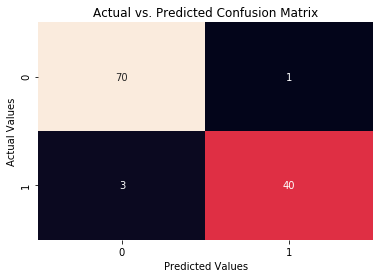

In [54]:
conf_mat = create_conf_mat(Y_test, predictions)
sns.heatmap(conf_mat, annot=True, fmt='d', cbar=False)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Actual vs. Predicted Confusion Matrix')
plt.show()

In [55]:
accuracy = model.score(X_test, Y_test)

print("Here is our mean accuracy on the test set:\n {0:.3f}"\
      .format(accuracy))

Here is our mean accuracy on the test set:
 0.965


## ROC Curve Metrics¶
A receiver operating characteristic (ROC) curve calculates the false positive 
rates and true positive rates across different thresholds. Let's graph these 
calculations.

If our curve is located in the top left corner of the plot, that indicates 
an ideal model; i.e., a false positive rate of 0 and true positive rate of 1. 
On the other hand, a ROC curve that is at 45 degrees is indicative of a model 
that is essentially randomly guessing.

We will also calculate the area under the curve (AUC). 
The AUC is used as a metric to differentiate the prediction power 
of the model for patients with cancer and those without it. 
Typically, a value closer to 1 means that our model was able 
to differentiate correctly from a random sample of the two target classes

In [56]:
model.classes_

array([0, 1], dtype=int64)

In [64]:
# We grab the second array from the output which corresponds to
# to the predicted probabilites of positive classes 
# Ordered wrt fit.classes_ in our case [0, 1] where 1 is our positive class
predictions_prob =model.predict_proba(X_test)[:, 1]
fpr2, tpr2, _ = roc_curve(Y_test,
                          predictions_prob,
                          pos_label = 1)
auc_rf = auc(fpr2, tpr2)

In [65]:
def plot_roc_curve(fpr, tpr, auc, xlim=None, ylim=None):
    """
    Purpose
    ----------
    Function creates ROC Curve for respective model given selected parameters.
    Optional x and y limits to zoom into graph

    Parameters
    ----------
    * fpr: Array returned from sklearn.metrics.roc_curve for increasing
            false positive rates
    * tpr: Array returned from sklearn.metrics.roc_curve for increasing
            true positive rates
    * auc: Float returned from sklearn.metrics.auc (Area under Curve)
    * xlim: Set upper and lower x-limits
    * ylim: Set upper and lower y-limits
    """
   
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_facecolor('#fafafa')

    plt.plot(fpr, tpr,
             color='red',
             linewidth=1)
    plt.title('ROC Curve For {0} (AUC = {1: 0.3f})'\
              .format('Random Forest', auc))

    plt.plot([0, 1], [0, 1], 'k--', lw=2) # Add Diagonal line
    plt.plot([0, 0], [1, 0], 'k--', lw=2, color = 'black')
    plt.plot([1, 0], [1, 1], 'k--', lw=2, color = 'black')
    if xlim is not None:
        plt.xlim(*xlim)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    plt.close()

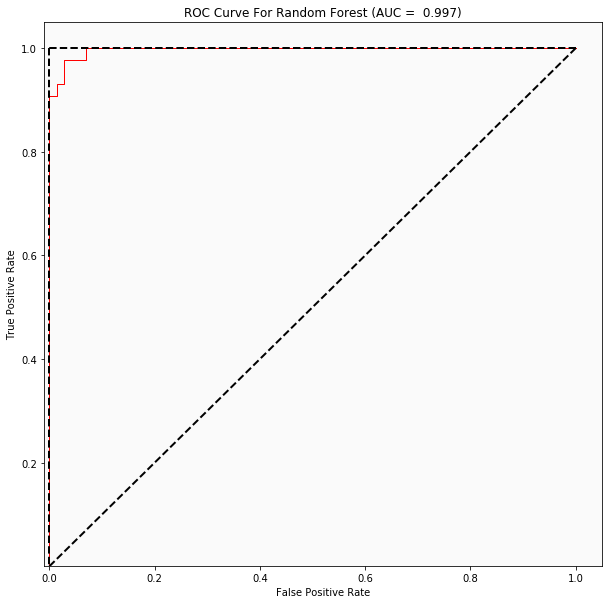

In [66]:
plot_roc_curve(fpr2, tpr2, auc_rf,xlim=(-0.01, 1.05), 
               ylim=(0.001, 1.05))

## Classification Report
The classification report is available through sklearn.metrics, this report gives many important classification metrics including:

- Precision: also the positive predictive value, is the number of correct predictions divided by the number of correct predictions plus false positives, so  tp/(tp+fp) 
- Recall: also known as the sensitivity, is the number of correct predictions divided by the total number of instances so  tp/(tp+fn)  where  fn  is the number of false negatives
- f1-score: this is defined as the weighted harmonic mean of both the precision and recall, where the f1-score at 1 is the best value and worst value at 0, as defined by the documentation
- support: number of instances that are the correct target values

In [67]:
print(classification_report(predictions, 
            Y_test, 
            target_names = ['Benign', 'Malignant']))

              precision    recall  f1-score   support

      Benign       0.99      0.96      0.97        73
   Malignant       0.93      0.98      0.95        41

   micro avg       0.96      0.96      0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

